In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from utils.bootstrap import *

# DataFrames

In [249]:
def get_means(path, fixed, which):
    means = [[], []]

    if which in ['kendall', 'spearman', 'hamming']:
        bert_or_rank = 'ranks'
    else:
        bert_or_rank = 'berts'

    for i in range(1, 21):
        loaded_arrays = np.load(f'{path}/run{i}{fixed}/run{i}_{bert_or_rank}.npz')
        if which == 'berts':
            m1key = 'move1'
            m2key = 'move2'
        elif which == 'kendall':
            m1key = 'kendall_move1'
            m2key = 'kendall_move2'
        else:
            m1key = 'move1'
            m2key = 'move2'
        m1 = loaded_arrays[m1key]
        m2 = loaded_arrays[m2key]
        mean_m1 = m1.mean()
        mean_m2 = m2.mean()

        means[0].append(mean_m1)
        means[1].append(mean_m2)

    return means

### Everything Free

In [250]:
claude_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-free-False-20-1.0/main', '_fixed', 'berts') 
claude_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-free-True-20-1.0/main', '', 'berts')
gpt35_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-False-20-1.0/main', '_fixed', 'berts')
gpt35_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-free-True-20-1.0/main', '', 'berts')
gpt4_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-False-20-1.0/main', '_fixed', 'berts')
gpt4_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-free-True-20-1.0/main', '', 'berts')
gpt4o_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-free-False-20-1.0/main', '', 'berts')
gpt4o_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-free-True-20-1.0/main', '', 'berts')
gpt4omini_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-free-False-20-1.0/main', '', 'berts')
gpt4omini_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-free-True-20-1.0/main', '', 'berts')

In [251]:
everything_free = pd.DataFrame([
    claude_anon[0], claude_anon[1],
    claude_exp[0], claude_exp[1],
    gpt35_anon[0], gpt35_anon[1],
    gpt35_exp[0], gpt35_exp[1],
    gpt4_anon[0], gpt4_anon[1],
    gpt4_exp[0], gpt4_exp[1],
    gpt4o_anon[0], gpt4o_anon[1],
    gpt4o_exp[0], gpt4o_exp[1],
    gpt4omini_anon[0], gpt4omini_anon[1],
    gpt4omini_exp[0], gpt4omini_exp[1]
]).T

everything_free.columns = [
    'c-a-1', 'c-a-2',
    'c-exp-1', 'c-exp-2',
    'gpt35-a-1', 'gpt35-a-2',
    'gpt35-exp-1', 'gpt35-exp-2',
    'gpt4-a-1', 'gpt4-a-2',
    'gpt4-exp-1', 'gpt4-exp-2',
    'gpt4o-a-1', 'gpt4o-a-2',
    'gpt4o-exp-1', 'gpt4o-exp-2',
    'gpt4omini-a-1', 'gpt4omini-a-2',
    'gpt4omini-exp-1', 'gpt4omini-exp-2',
]

### Everything Rank

In [252]:
claude_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-rank-False-20-1.0/main', '_fixed', 'kendall') 
claude_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/claude35sonnet-rank-True-20-1.0/main', '', 'kendall')
gpt35_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-False-20-1.0/main', '_fixed', 'kendall')
gpt35_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt3.5turbo-rank-True-20-1.0/main', '', 'kendall')
gpt4_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-False-20-1.0/main', '_fixed', 'kendall')
gpt4_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4-rank-True-20-1.0/main', '', 'kendall')
gpt4o_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-rank-False-20-1.0/main', '', 'kendall')
gpt4o_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-rank-True-20-1.0/main', '', 'kendall')
gpt4omini_anon = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-rank-False-20-1.0/main', '', 'kendall')
gpt4omini_exp = get_means('/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4omini-rank-True-20-1.0/main', '', 'kendall')

In [253]:
everything_rank = pd.DataFrame([
    claude_anon[0], claude_anon[1],
    claude_exp[0], claude_exp[1],
    gpt35_anon[0], gpt35_anon[1],
    gpt35_exp[0], gpt35_exp[1],
    gpt4_anon[0], gpt4_anon[1],
    gpt4_exp[0], gpt4_exp[1],
    gpt4o_anon[0], gpt4o_anon[1],
    gpt4o_exp[0], gpt4o_exp[1],
    gpt4omini_anon[0], gpt4omini_anon[1],
    gpt4omini_exp[0], gpt4omini_exp[1],

]).T

everything_rank.columns = [
    'c-a-1', 'c-a-2',
    'c-exp-1', 'c-exp-2',
    'gpt35-a-1', 'gpt35-a-2',
    'gpt35-exp-1', 'gpt35-exp-2',
    'gpt4-a-1', 'gpt4-a-2',
    'gpt4-exp-1', 'gpt4-exp-2',
    'gpt4o-a-1', 'gpt4o-a-2',
    'gpt4o-exp-1', 'gpt4o-exp-2',
    'gpt4omini-a-1', 'gpt4omini-a-2',
    'gpt4omini-exp-1', 'gpt4omini-exp-2',
]

# Define colors and style

In [254]:
sns.set_style('whitegrid')

In [255]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [256]:
reds = [
    "#FF0000", "#FF1A1A", "#FF3333", "#FF4D4D", "#FF6666",
    "#FF8080", "#FF9999", "#FFB2B2", "#FFCCCC", "#FFE5E5",
    "#CC0000", "#CC1A1A", "#CC3333", "#CC4D4D", "#CC6666",
    "#CC8080", "#CC9999", "#CCB2B2", "#CCCCCC", "#CCE5E5"
]
main_red = '#800000'

greens = [
    "#00FF00", "#1AFF1A", "#33FF33", "#4DFF4D", "#66FF66",
    "#80FF80", "#99FF99", "#B2FFB2", "#CCFFCC", "#E5FFE5",
    "#00CC00", "#1ACC1A", "#33CC33", "#4DCC4D", "#66CC66",
    "#80CC80", "#99CC99", "#B2CCB2", "#CCCCCC", "#E5CCE5"
]
main_green = '#006400'

blues = [
    "#0000FF", "#1A1AFF", "#3333FF", "#4D4DFF", "#6666FF",
    "#8080FF", "#9999FF", "#B2B2FF", "#CCCCFF", "#E5E5FF",
    "#0000CC", "#1A1ACC", "#3333CC", "#4D4DCC", "#6666CC",
    "#8080CC", "#9999CC", "#B2B2CC", "#CCCCCC", "#E5E5CC"
]
main_blue = '#4169e1'

purples = [
    "#800080", "#8B008B", "#9400D3", "#9932CC", "#BA55D3",
    "#DA70D6", "#EE82EE", "#DDA0DD", "#FF00FF", "#FF33FF",
    "#CC00CC", "#CC33CC", "#CC66CC", "#CC99CC", "#CCB2CC",
    "#CCCCCC", "#E5CCE5", "#E5CCFF", "#E5B2FF", "#E580FF"
]
main_purple = '#A020F0'

oranges = [
    "#FFA500", "#FFB733", "#FFCA66", "#FFDD99", "#FFE0B2",
    "#FF8C00", "#FF9F33", "#FFB266", "#FFC599", "#FFD6B2",
    "#FF7000", "#FF8233", "#FF9566", "#FFA899", "#FFB9B2",
    "#FF5A00", "#FF6C33", "#FF7E66", "#FF9099", "#FFA1B2"
]
main_orange = '#FF4500'


# Fig 1:
## Move 1 to Move 2 plots

We show 20 simulations per model as dotted lines with the average Inconsistency Score as the solid line.

Depicts change in inconsistency score from move 1 to move 2 for each model

In [257]:
def plot_lines(df, label_name, cols, colors, main_color, plot, first=False):
    interested = df[cols]
    interested.columns = ['Move 1', 'Move 2']

    for i in range(20):
        sns.lineplot(
            data=interested.T[i],
            lw = 1,
            alpha = 0.5,
            linestyle='--',
            color=colors[i],
            ax=plot
        )
    
    mean_line = sns.lineplot(
        data=[interested['Move 1'].mean(), interested['Move 2'].mean()],
        linewidth=3,
        linestyle='-',
        color=main_color,
        ax=plot
    )

    legend_line = Line2D([0], [0], color=main_color, lw=3)
    plot.legend([legend_line], [label_name], loc='upper right')

    if first:
        plot.set_ylabel(first, fontsize=24)
    else:
        plot.set_ylabel('')
    
    # plot.set_ylim([0, 1])
    # plot.set_yscale('log')

### Anonymous

#### Free

In [299]:
all_params_free = [
    ('Claude 3.5 Sonnet', ['c-a-1', 'c-a-2'], oranges, main_orange, r'$\mathcal{I}_{\mathcal{B}}$'),
    ('GPT-3.5 Turbo', ['gpt35-a-1', 'gpt35-a-2'], greens, main_green),
    ('GPT-4', ['gpt4-a-1', 'gpt4-a-2'], purples, main_purple),
    ('GPT-4o', ['gpt4o-a-1', 'gpt4o-a-2'], reds, main_red),
    ('GPT-4o mini', ['gpt4omini-a-1', 'gpt4omini-a-2'], blues, main_blue)
]

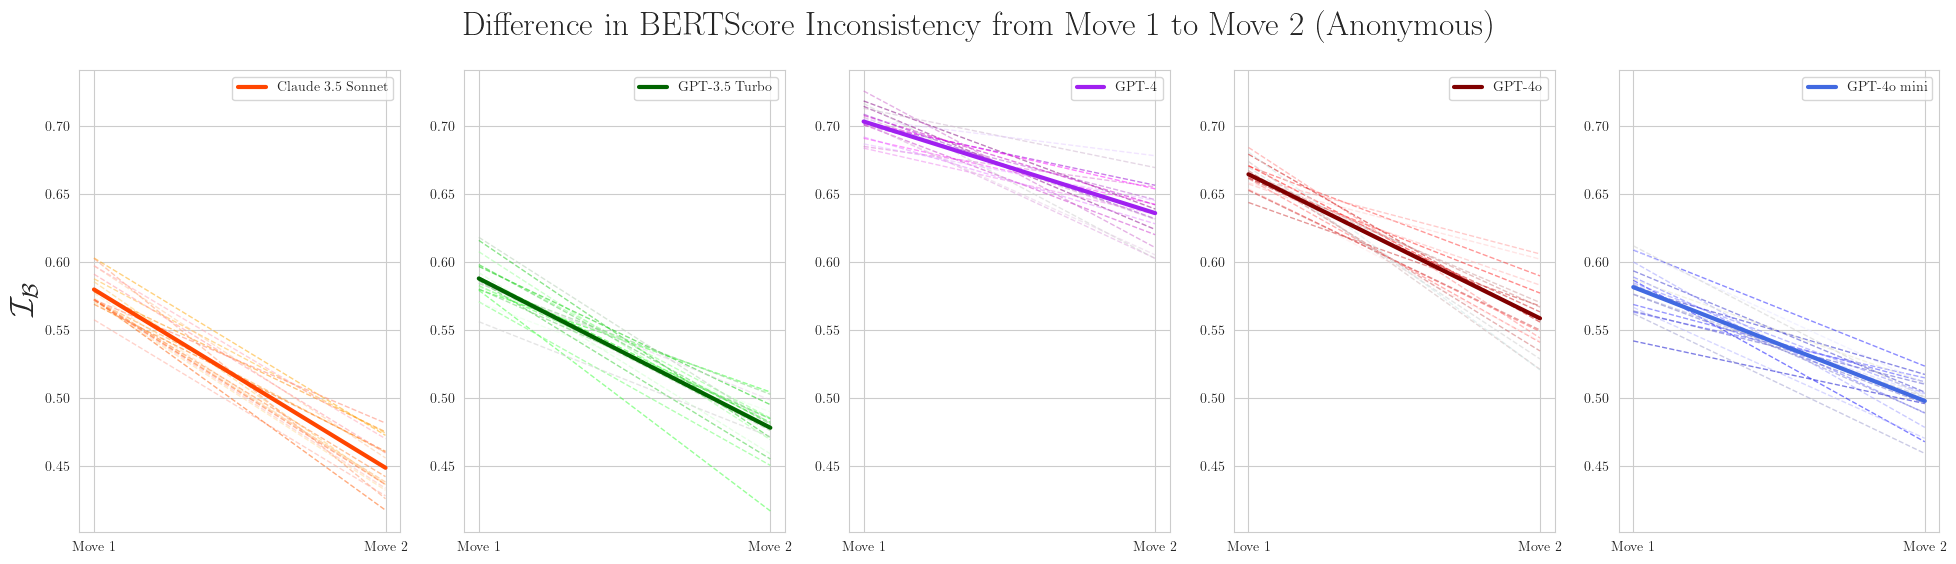

In [300]:
fig, axes = plt.subplots(1, len(all_params_free), sharey=True, figsize=(24, 6))
fig.suptitle('Difference in BERTScore Inconsistency from Move 1 to Move 2 (Anonymous)', fontsize=24)
for i, ax in enumerate(axes):
    ax.yaxis.set_tick_params(labelleft=True)

for i, params in enumerate(all_params_free):
    try:
        first=params[4]
    except IndexError:
        first=False
    plot_lines(everything_free, params[0], params[1], params[2], params[3], axes[i], first=first)

#### Rank

In [301]:
all_params_rank = [
    ('Claude 3.5 Sonnet', ['c-a-1', 'c-a-2'], oranges, main_orange, r'$\mathcal{I}_{\tau}$'),
    ('GPT-3.5 Turbo', ['gpt35-a-1', 'gpt35-a-2'], greens, main_green),
    ('GPT-4', ['gpt4-a-1', 'gpt4-a-2'], purples, main_purple),
    ('GPT-4o', ['gpt4o-a-1', 'gpt4o-a-2'], reds, main_red),
    ('GPT-4o mini', ['gpt4omini-a-1', 'gpt4omini-a-2'], blues, main_blue)
]

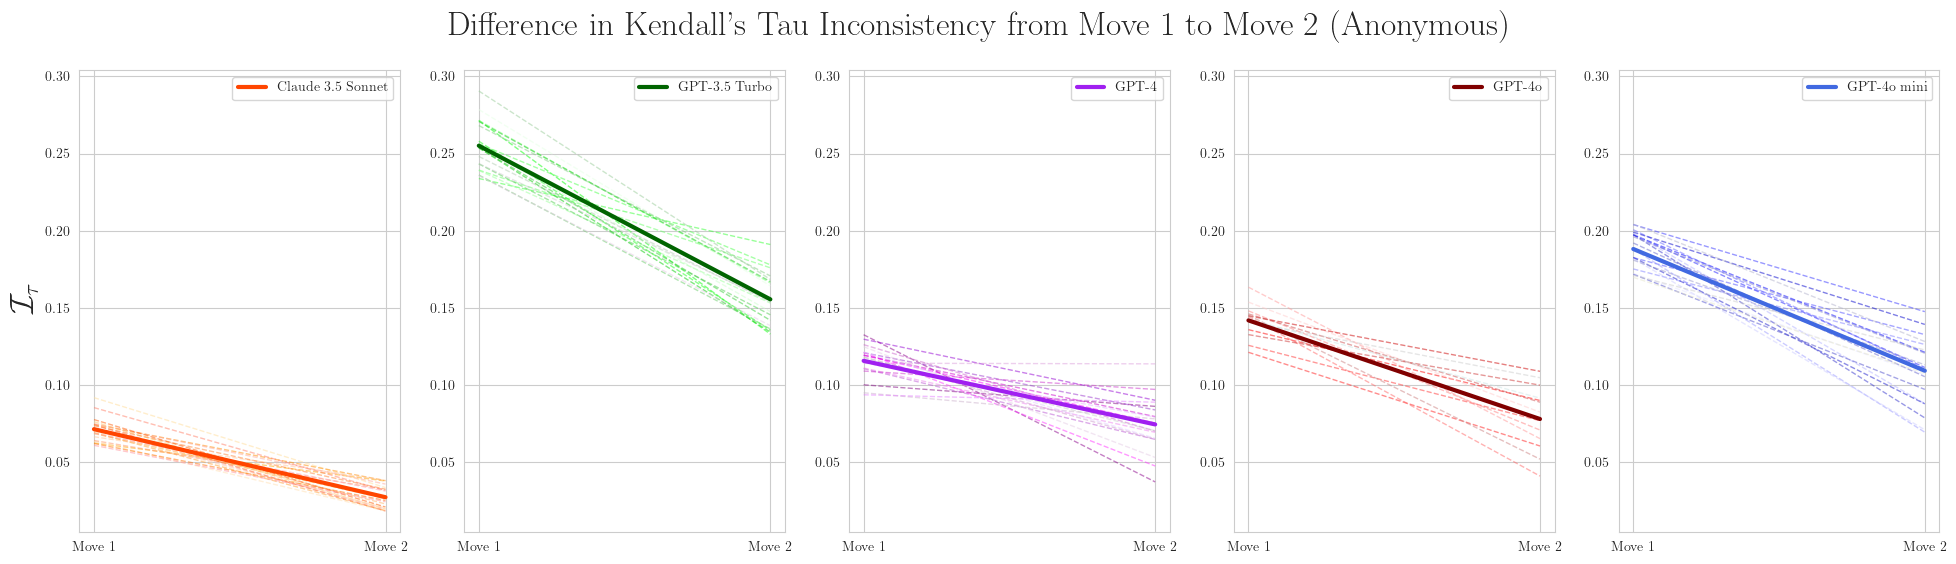

In [302]:
fig, axes = plt.subplots(1, len(all_params), sharey=True, figsize=(24, 6))
fig.suptitle(
    'Difference in Kendall\'s Tau Inconsistency from Move 1 to Move 2 (Anonymous)',
    x=0.5,
    fontsize=24
)
for i, ax in enumerate(axes):
    ax.yaxis.set_tick_params(labelleft=True)

for i, params in enumerate(all_params_rank):
    try:
        first=params[4]
    except IndexError:
        first=False
    plot_lines(everything_rank, params[0], params[1], params[2], params[3], axes[i], first=first)

### Explicit

#### Free

In [303]:
all_params_free = [
    ('Claude 3.5 Sonnet', ['c-exp-1', 'c-exp-2'], oranges, main_orange, r'$\mathcal{I}_{\mathcal{B}}$'),
    ('GPT-3.5 Turbo', ['gpt35-exp-1', 'gpt35-exp-2'], greens, main_green),
    ('GPT-4', ['gpt4-exp-1', 'gpt4-exp-2'], purples, main_purple),
    ('GPT-4o', ['gpt4o-exp-1', 'gpt4o-exp-2'], reds, main_red),
    ('GPT-4o mini', ['gpt4omini-exp-1', 'gpt4omini-exp-2'], blues, main_blue)
]

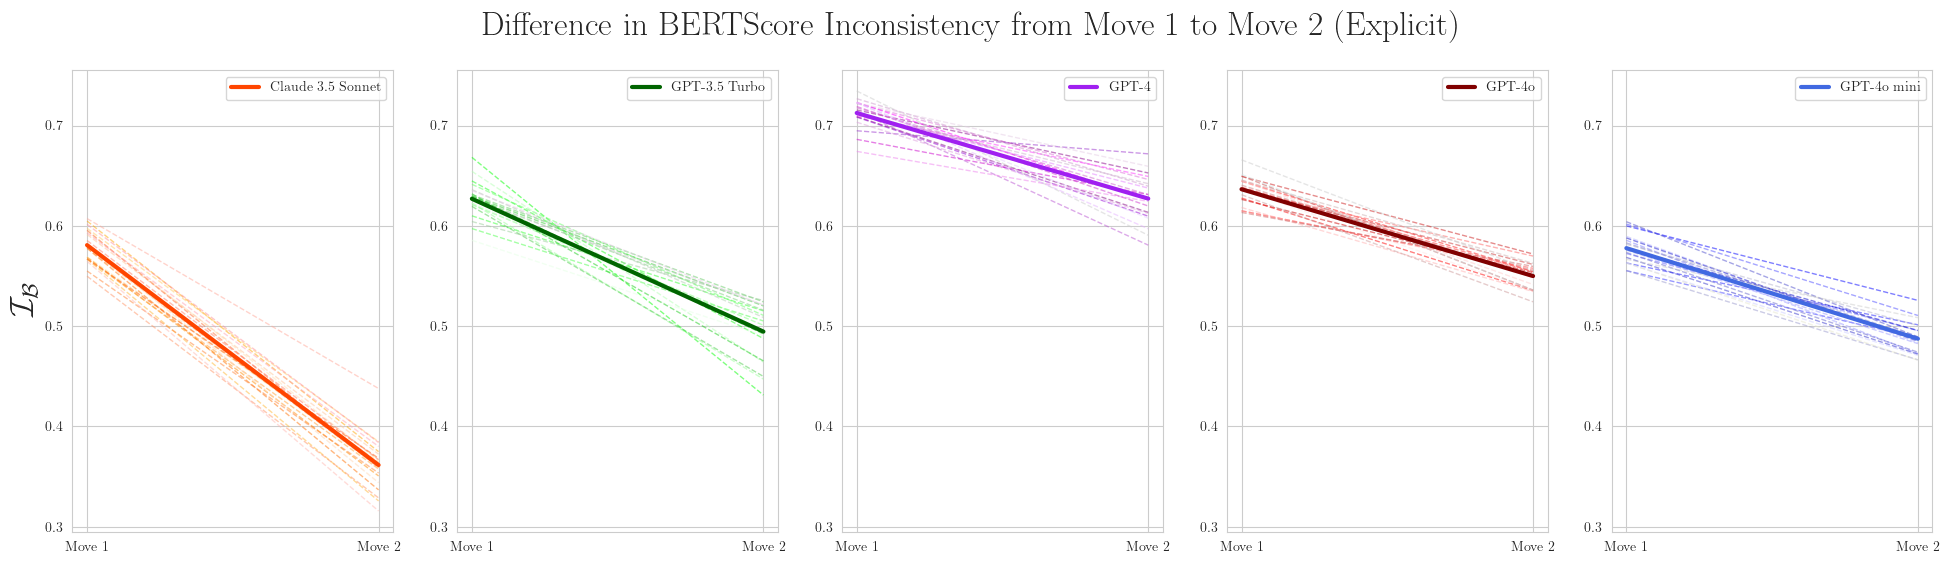

In [304]:
fig, axes = plt.subplots(1, len(all_params_free), sharey=True, figsize=(24, 6))
fig.suptitle('Difference in BERTScore Inconsistency from Move 1 to Move 2 (Explicit)', fontsize=24)
for i, ax in enumerate(axes):
    ax.yaxis.set_tick_params(labelleft=True)

for i, params in enumerate(all_params_free):
    try:
        first=params[4]
    except IndexError:
        first=False
    plot_lines(everything_free, params[0], params[1], params[2], params[3], axes[i], first=first)

#### Rank

In [305]:
all_params_rank = [
    ('Claude 3.5 Sonnet', ['c-exp-1', 'c-exp-2'], oranges, main_orange, r'$\mathcal{I}_{\tau}$'),
    ('GPT-3.5 Turbo', ['gpt35-exp-1', 'gpt35-exp-2'], greens, main_green),
    ('GPT-4', ['gpt4-exp-1', 'gpt4-exp-2'], purples, main_purple),
    ('GPT-4o', ['gpt4o-exp-1', 'gpt4o-exp-2'], reds, main_red),
    ('GPT-4o mini', ['gpt4omini-exp-1', 'gpt4omini-exp-2'], blues, main_blue)
]

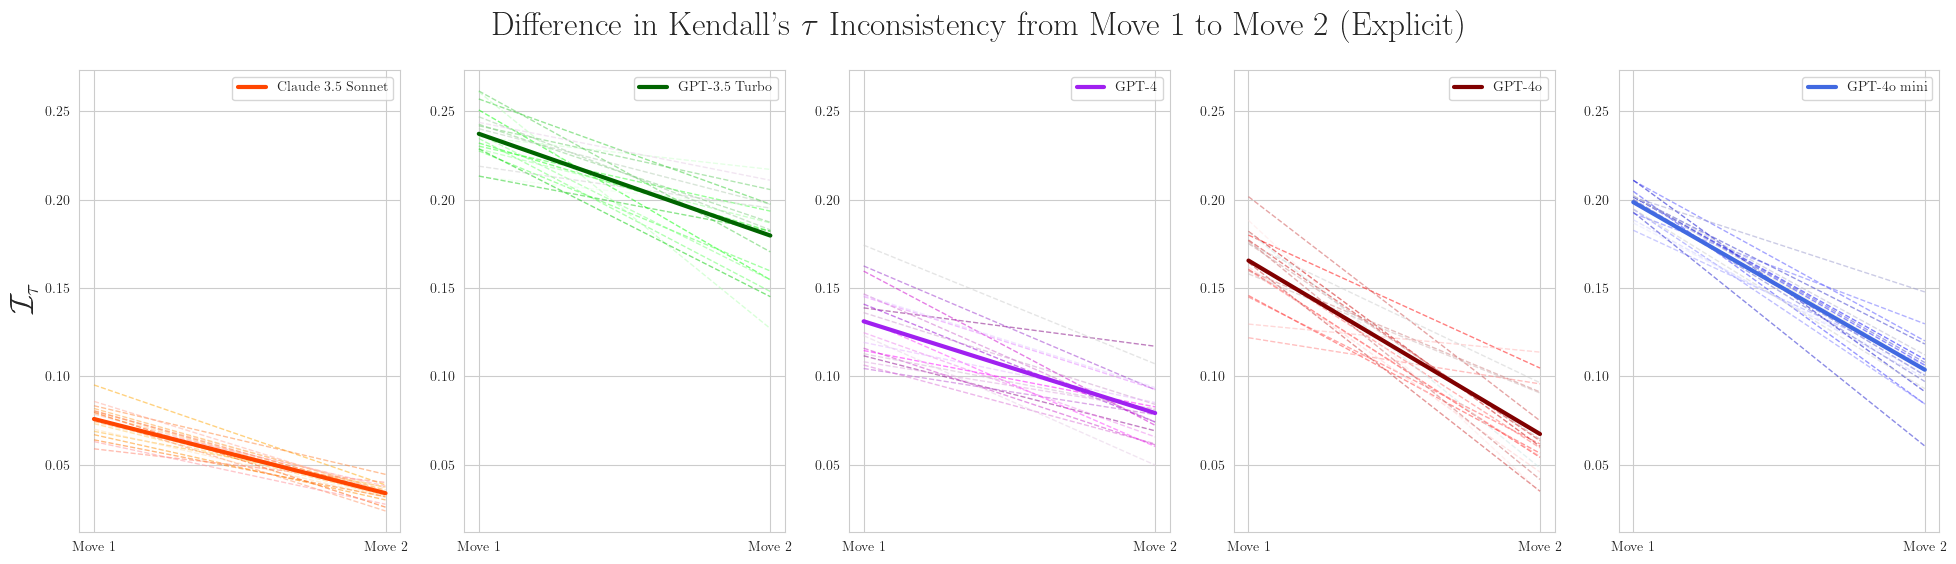

In [407]:
fig, axes = plt.subplots(1, len(all_params_rank), sharey=True, figsize=(24, 6))
fig.suptitle(r"Difference in Kendall's $\tau$ Inconsistency from Move 1 to Move 2 (Explicit)", fontsize=24)
for i, ax in enumerate(axes):
    ax.yaxis.set_tick_params(labelleft=True)

for i, params in enumerate(all_params_rank):
    try:
        first=params[4]
    except IndexError:
        first=False
    plot_lines(everything_rank, params[0], params[1], params[2], params[3], axes[i], first=first)

# Fig 2

## Number of Pairs Above General Mean

We plot counts with 95% bootstrapped error bars for each model

Depicts how many individual pairs of responses are above the general mean

In [318]:
def get_all_scores(model, loc, fixed=False):
    scores = []

    paths = [
        f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/{model}-{loc}-False-20-1.0/main',
        f'/Users/aryanshrivastava/Desktop/LLMWargamingConfidence/logging/outputs/v4/gpt4o-{loc}-True-20-1.0/main'
    ]

    if loc == 'free':
        bert_or_rank = 'berts'
        moves = ('move1', 'move2')
    else:
        bert_or_rank = 'ranks'
        moves = ('kendall_move1', 'kendall_move2')
    
    for path in paths:
        if fixed:
            if 'False' in path:
                fix = '_fixed'
            else:
                fix = ''
        else:
            fix = ''
        for i in range(1, 21):
            curr_berts = np.load(f'{path}/run{i}{fix}/run{i}_{bert_or_rank}.npz')
            m1 = curr_berts[moves[0]]
            m2 = curr_berts[moves[1]]
            scores.extend(m1)
            scores.extend(m2)
            
    return scores

### Free

In [319]:
overall_free_mean = (everything_free.mean()).mean()

In [320]:
mini_free_scores = get_all_scores('gpt4omini', 'free')
gpt4o_free_scores = get_all_scores('gpt4o', 'free')
gpt35_free_scores = get_all_scores('gpt3.5turbo', 'free', fixed=True)
claude_free_scores = get_all_scores('claude35sonnet', 'free', fixed=True)
gpt4_free_scores = get_all_scores('gpt4', 'free', fixed=True)

In [321]:
mini_free_bootstrapped = bootstrap_percent_over(mini_free_scores, overall_free_mean)
gpt4o_free_bootstrapped = bootstrap_percent_over(gpt4o_free_scores, overall_free_mean)
gpt35_free_bootstrapped = bootstrap_percent_over(gpt35_free_scores, overall_free_mean)
claude_free_bootstrapped = bootstrap_percent_over(claude_free_scores, overall_free_mean)
gpt4_free_bootstrapped = bootstrap_percent_over(gpt4_free_scores, overall_free_mean)

In [322]:
mini_free_described = pd.DataFrame(mini_free_bootstrapped).describe()
gpt4o_free_described = pd.DataFrame(gpt4o_free_bootstrapped).describe()
gpt35_free_described = pd.DataFrame(gpt35_free_bootstrapped).describe()
claude_free_described = pd.DataFrame(claude_free_bootstrapped).describe()
gpt4_free_described = pd.DataFrame(gpt4_free_bootstrapped).describe()

In [323]:
descriptions_free = [
    claude_free_described, 
    gpt35_free_described, 
    gpt4_free_described, 
    gpt4o_free_described, 
    mini_free_described
]

In [327]:
means_free = np.array([d.T['mean'][0] for d in descriptions_free])
errs_free = np.array([2 * d.T['std'][0] for d in descriptions_free])

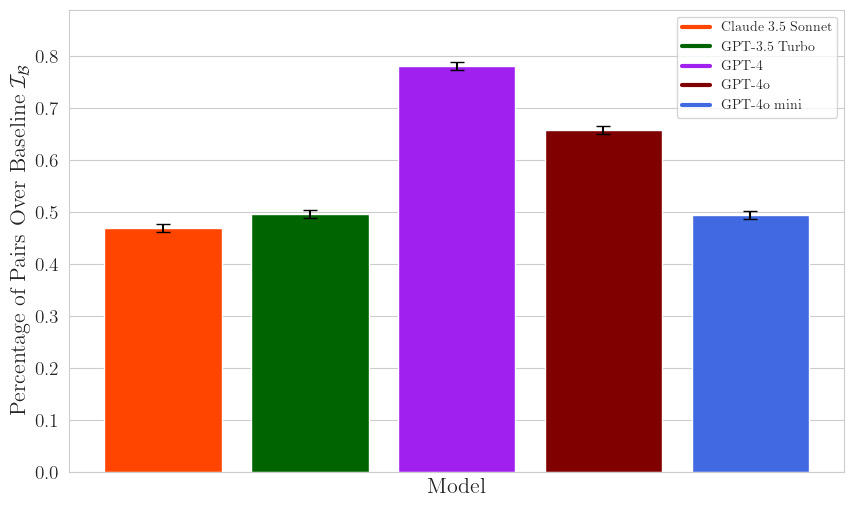

In [337]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars = ax.bar(np.arange(len(means)), means_free, yerr=errs, capsize=5, color=colors)

# Customize the plot
ax.set_ylabel(r'Percentage of Pairs Over Baseline $\mathcal{I}_{\mathcal{B}}$', fontsize=16)
ax.set_title('')
ax.set_ylim(0, max(means_free) + max(errs_free) + 0.1)
ax.tick_params(axis='y', labelsize=14) 
ax.set_xlabel('Model', fontsize=16)

plt.xticks([], [])

legend_lines = []
label_names = ['Claude 3.5 Sonnet', 'GPT-3.5 Turbo', 'GPT-4', 'GPT-4o', 'GPT-4o mini']
for color in [main_orange, main_green, main_purple, main_red, main_blue]:
    legend_lines.append(Line2D([0], [0], color=color, lw=3))

    
ax.legend(legend_lines, label_names, loc='upper right')

plt.show()

Bar heights are mean model-wide percentage of pairs above the overall mean of inconsistency BERT scores.

### Rank

In [329]:
overall_rank_mean = (everything_rank.mean()).mean()

In [330]:
mini_rank_scores = get_all_scores('gpt4omini', 'rank')
gpt4o_rank_scores = get_all_scores('gpt4o', 'rank')
gpt35_rank_scores = get_all_scores('gpt3.5turbo', 'rank', fixed=True)
claude_rank_scores = get_all_scores('claude35sonnet', 'rank', fixed=True)
gpt4_rank_scores = get_all_scores('gpt4', 'rank', fixed=True)


In [332]:
mini_rank_bootstrapped = bootstrap_percent_over(mini_rank_scores, overall_rank_mean)
gpt4o_rank_bootstrapped = bootstrap_percent_over(gpt4o_rank_scores, overall_rank_mean)
gpt35_rank_bootstrapped = bootstrap_percent_over(gpt35_rank_scores, overall_rank_mean)
claude_rank_bootstrapped = bootstrap_percent_over(claude_rank_scores, overall_rank_mean)
gpt4_rank_bootstrapped = bootstrap_percent_over(gpt4_rank_scores, overall_rank_mean)

In [333]:
mini_rank_described = pd.DataFrame(mini_rank_bootstrapped).describe()
gpt4o_rank_described = pd.DataFrame(gpt4o_rank_bootstrapped).describe()
gpt35_rank_described = pd.DataFrame(gpt35_rank_bootstrapped).describe()
claude_rank_described = pd.DataFrame(claude_rank_bootstrapped).describe()
gpt4_rank_described = pd.DataFrame(gpt4_rank_bootstrapped).describe()


In [334]:
descriptions_rank = [
    claude_rank_described, 
    gpt35_rank_described, 
    gpt4_rank_described, 
    gpt4o_rank_described, 
    mini_rank_described
]

In [335]:
means_rank = np.array([d.T['mean'][0] for d in descriptions_rank])
errs_rank = np.array([2 * d.T['std'][0] for d in descriptions_rank])

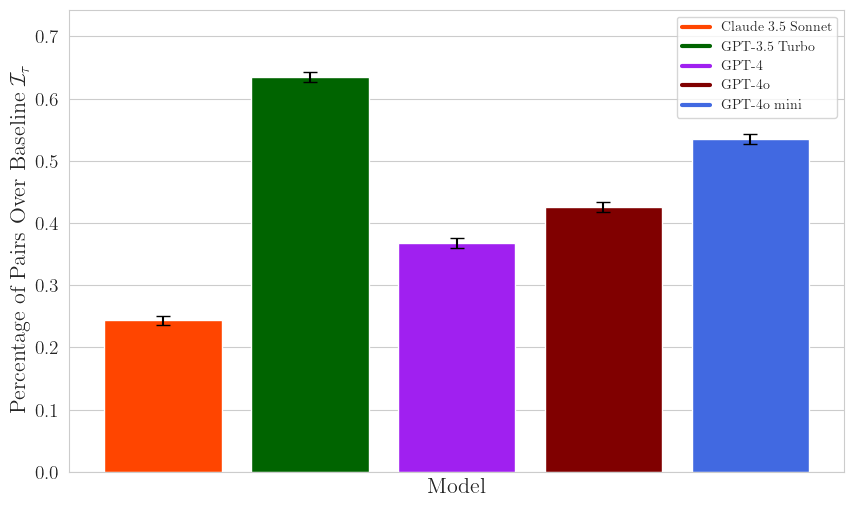

In [336]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars = ax.bar(np.arange(len(means)), means, yerr=errs, capsize=5, color=colors)

# Customize the plot
ax.set_ylabel(r'Percentage of Pairs Over Baseline $\mathcal{I}_\tau$', fontsize=16)
ax.set_title('')
ax.set_ylim(0, max(means_rank) + max(errs_rank) + 0.1)
ax.tick_params(axis='y', labelsize=14) 
ax.set_xlabel('Model', fontsize=16)

plt.xticks([], [])

legend_lines = []
label_names = ['Claude 3.5 Sonnet', 'GPT-3.5 Turbo', 'GPT-4', 'GPT-4o', 'GPT-4o mini']
for color in [main_orange, main_green, main_purple, main_red, main_blue]:
    legend_lines.append(Line2D([0], [0], color=color, lw=3))

    
ax.legend(legend_lines, label_names, loc='upper right')

plt.show()

Bar heights are mean model-wide percentage of pairs above the overall mean of inconsistency BERT scores.

# Fig 3

## Table going over everything

Inconsistency scores over all models, all levels of control, all explicitness

Basically contains all of our information

In [381]:
everything_free

,c-a-1,c-a-2,c-exp-1,c-exp-2,gpt35-a-1,gpt35-a-2,gpt35-exp-1,gpt35-exp-2,gpt4-a-1,gpt4-a-2,gpt4-exp-1,gpt4-exp-2,gpt4o-a-1,gpt4o-a-2,gpt4o-exp-1,gpt4o-exp-2,gpt4omini-a-1,gpt4omini-a-2,gpt4omini-exp-1,gpt4omini-exp-2
0,0.602840,0.472521,0.604870,0.374881,0.588776,0.482067,0.668411,0.431322,0.718185,0.638835,0.708973,0.613509,0.670693,0.558443,0.627771,0.535501,0.586507,0.467827,0.600037,0.525729
1,0.587563,0.474181,0.566833,0.325706,0.579724,0.504388,0.644892,0.487676,0.714248,0.623808,0.715615,0.652814,0.661521,0.577067,0.644566,0.554760,0.608716,0.523398,0.563083,0.501373
2,0.585428,0.436464,0.597583,0.384739,0.579137,0.416993,0.610080,0.515286,0.701615,0.656255,0.708567,0.609741,0.670286,0.589686,0.638673,0.554255,0.568662,0.511796,0.555371,0.488374
3,0.570553,0.432218,0.569157,0.364641,0.582504,0.484922,0.597384,0.505214,0.708453,0.631635,0.694918,0.671895,0.653112,0.548878,0.615033,0.557767,0.563158,0.514783,0.601819,0.510678
4,0.577045,0.436403,0.594787,0.366239,0.570683,0.450486,0.641493,0.510783,0.700711,0.645645,0.714483,0.580840,0.661162,0.540933,0.635423,0.569952,0.588888,0.488874,0.572453,0.495663
5,0.578063,0.475122,0.568635,0.350610,0.597853,0.485270,0.621257,0.500956,0.684785,0.655024,0.722239,0.646322,0.684041,0.544038,0.615158,0.556302,0.584658,0.503368,0.585634,0.472694
6,0.572134,0.460063,0.567066,0.357607,0.607458,0.469375,0.622818,0.447220,0.683548,0.635008,0.674338,0.624486,0.662313,0.605822,0.645738,0.548582,0.599945,0.478393,0.575807,0.482602
7,0.571809,0.438261,0.577859,0.359131,0.581588,0.503727,0.654438,0.464176,0.702223,0.602589,0.703435,0.612539,0.657209,0.582935,0.618362,0.534552,0.566564,0.470391,0.589535,0.483455
8,0.597133,0.455942,0.591395,0.372346,0.592081,0.458995,0.622869,0.494315,0.703031,0.653624,0.723219,0.626170,0.658057,0.601994,0.644896,0.541582,0.576373,0.502522,0.562928,0.470986
9,0.573423,0.437289,0.581566,0.343944,0.570248,0.489775,0.585651,0.490591,0.690815,0.642268,0.709846,0.649356,0.653855,0.541858,0.636232,0.535494,0.609102,0.510708,0.588383,0.471221


### Free

In [383]:
claude_anon_free_mean_m1_bootstrapped = bootstrap_mean(everything_free['c-a-1'], n=10_000)
claude_anon_free_mean_m2_bootstrapped = bootstrap_mean(everything_free['c-a-2'], n=10_000)
claude_exp_free_mean_m1_bootstrapped = bootstrap_mean(everything_free['c-exp-1'], n=10_000)
claude_exp_free_mean_m2_bootstrapped = bootstrap_mean(everything_free['c-exp-2'], n=10_000)

gpt35_anon_free_mean_m1_bootstrapped = bootstrap_mean(everything_free['gpt35-a-1'], n=10_000)
gpt35_anon_free_mean_m2_bootstrapped = bootstrap_mean(everything_free['gpt35-a-2'], n=10_000)
gpt35_exp_free_mean_m1_bootstrapped = bootstrap_mean(everything_free['gpt35-exp-1'], n=10_000)
gpt35_exp_free_mean_m2_bootstrapped = bootstrap_mean(everything_free['gpt35-exp-2'], n=10_000)

gpt4_anon_free_mean_m1_bootstrapped = bootstrap_mean(everything_free['gpt4-a-1'], n=10_000)
gpt4_anon_free_mean_m2_bootstrapped = bootstrap_mean(everything_free['gpt4-a-2'], n=10_000)
gpt4_exp_free_mean_m1_bootstrapped = bootstrap_mean(everything_free['gpt4-exp-1'], n=10_000)
gpt4_exp_free_mean_m2_bootstrapped = bootstrap_mean(everything_free['gpt4-exp-2'], n=10_000)

gpt4o_anon_free_mean_m1_bootstrapped = bootstrap_mean(everything_free['gpt4o-a-1'], n=10_000)
gpt4o_anon_free_mean_m2_bootstrapped = bootstrap_mean(everything_free['gpt4o-a-2'], n=10_000)
gpt4o_exp_free_mean_m1_bootstrapped = bootstrap_mean(everything_free['gpt4o-exp-1'], n=10_000)
gpt4o_exp_free_mean_m2_bootstrapped = bootstrap_mean(everything_free['gpt4o-exp-2'], n=10_000)

gpt4omini_anon_free_mean_m1_bootstrapped = bootstrap_mean(everything_free['gpt4omini-a-1'], n=10_000)
gpt4omini_anon_free_mean_m2_bootstrapped = bootstrap_mean(everything_free['gpt4omini-a-2'], n=10_000)
gpt4omini_exp_free_mean_m1_bootstrapped = bootstrap_mean(everything_free['gpt4omini-exp-1'], n=10_000)
gpt4omini_exp_free_mean_m2_bootstrapped = bootstrap_mean(everything_free['gpt4omini-exp-2'], n=10_000)

In [384]:
## CLAUDE
# anon
claude_anon_free_mean_m1_bootstrapped_min, claude_anon_free_mean_m1_bootstrapped_max = (
    np.percentile(claude_anon_free_mean_m1_bootstrapped, 2.5), np.percentile(claude_anon_free_mean_m1_bootstrapped, 97.5)
)
claude_anon_free_mean_m1_bootstrapped_margin = (claude_anon_free_mean_m1_bootstrapped_max - claude_anon_free_mean_m1_bootstrapped_min)/2

claude_anon_free_mean_m2_bootstrapped_min, claude_anon_free_mean_m2_bootstrapped_max = (
    np.percentile(claude_anon_free_mean_m2_bootstrapped, 2.5), np.percentile(claude_anon_free_mean_m2_bootstrapped, 97.5)
)
claude_anon_free_mean_m2_bootstrapped_margin = (claude_anon_free_mean_m2_bootstrapped_max - claude_anon_free_mean_m2_bootstrapped_min)/2

# explicit
claude_exp_free_mean_m1_bootstrapped_min, claude_exp_free_mean_m1_bootstrapped_max = (
    np.percentile(claude_exp_free_mean_m1_bootstrapped, 2.5), np.percentile(claude_exp_free_mean_m1_bootstrapped, 97.5)
)
claude_exp_free_mean_m1_bootstrapped_margin = (claude_exp_free_mean_m1_bootstrapped_max - claude_exp_free_mean_m1_bootstrapped_min)/2

claude_exp_free_mean_m2_bootstrapped_min, claude_exp_free_mean_m2_bootstrapped_max = (
    np.percentile(claude_exp_free_mean_m2_bootstrapped, 2.5), np.percentile(claude_exp_free_mean_m2_bootstrapped, 97.5)
)
claude_exp_free_mean_m2_bootstrapped_margin = (claude_exp_free_mean_m2_bootstrapped_max - claude_exp_free_mean_m2_bootstrapped_min)/2

## GPT-3.5 Turbo
# anon
gpt35_anon_free_mean_m1_bootstrapped_min, gpt35_anon_free_mean_m1_bootstrapped_max = (
    np.percentile(gpt35_anon_free_mean_m1_bootstrapped, 2.5), np.percentile(gpt35_anon_free_mean_m1_bootstrapped, 97.5)
)
gpt35_anon_free_mean_m1_bootstrapped_margin = (gpt35_anon_free_mean_m1_bootstrapped_max - gpt35_anon_free_mean_m1_bootstrapped_min)/2

gpt35_anon_free_mean_m2_bootstrapped_min, gpt35_anon_free_mean_m2_bootstrapped_max = (
    np.percentile(gpt35_anon_free_mean_m2_bootstrapped, 2.5), np.percentile(gpt35_anon_free_mean_m2_bootstrapped, 97.5)
)
gpt35_anon_free_mean_m2_bootstrapped_margin = (gpt35_anon_free_mean_m2_bootstrapped_max - gpt35_anon_free_mean_m2_bootstrapped_min)/2

# explicit
gpt35_exp_free_mean_m1_bootstrapped_min, gpt35_exp_free_mean_m1_bootstrapped_max = (
    np.percentile(gpt35_exp_free_mean_m1_bootstrapped, 2.5), np.percentile(gpt35_exp_free_mean_m1_bootstrapped, 97.5)
)
gpt35_exp_free_mean_m1_bootstrapped_margin = (gpt35_exp_free_mean_m1_bootstrapped_max - gpt35_exp_free_mean_m1_bootstrapped_min)/2

gpt35_exp_free_mean_m2_bootstrapped_min, gpt35_exp_free_mean_m2_bootstrapped_max = (
    np.percentile(gpt35_exp_free_mean_m2_bootstrapped, 2.5), np.percentile(gpt35_exp_free_mean_m2_bootstrapped, 97.5)
)
gpt35_exp_free_mean_m2_bootstrapped_margin = (gpt35_exp_free_mean_m2_bootstrapped_max - gpt35_exp_free_mean_m2_bootstrapped_min)/2

## GPT-4
# anon
gpt4_anon_free_mean_m1_bootstrapped_min, gpt4_anon_free_mean_m1_bootstrapped_max = (
    np.percentile(gpt4_anon_free_mean_m1_bootstrapped, 2.5), np.percentile(gpt4_anon_free_mean_m1_bootstrapped, 97.5)
)
gpt4_anon_free_mean_m1_bootstrapped_margin = (gpt4_anon_free_mean_m1_bootstrapped_max - gpt4_anon_free_mean_m1_bootstrapped_min)/2

gpt4_anon_free_mean_m2_bootstrapped_min, gpt4_anon_free_mean_m2_bootstrapped_max = (
    np.percentile(gpt4_anon_free_mean_m2_bootstrapped, 2.5), np.percentile(gpt4_anon_free_mean_m2_bootstrapped, 97.5)
)
gpt4_anon_free_mean_m2_bootstrapped_margin = (gpt4_anon_free_mean_m2_bootstrapped_max - gpt4_anon_free_mean_m2_bootstrapped_min)/2

# explicit
gpt4_exp_free_mean_m1_bootstrapped_min, gpt4_exp_free_mean_m1_bootstrapped_max = (
    np.percentile(gpt4_exp_free_mean_m1_bootstrapped, 2.5), np.percentile(gpt4_exp_free_mean_m1_bootstrapped, 97.5)
)
gpt4_exp_free_mean_m1_bootstrapped_margin = (gpt4_exp_free_mean_m1_bootstrapped_max - gpt4_exp_free_mean_m1_bootstrapped_min)/2

gpt4_exp_free_mean_m2_bootstrapped_min, gpt4_exp_free_mean_m2_bootstrapped_max = (
    np.percentile(gpt4_exp_free_mean_m2_bootstrapped, 2.5), np.percentile(gpt4_exp_free_mean_m2_bootstrapped, 97.5)
)
gpt4_exp_free_mean_m2_bootstrapped_margin = (gpt4_exp_free_mean_m2_bootstrapped_max - gpt4_exp_free_mean_m2_bootstrapped_min)/2

## GPT-4o
# anon
gpt4o_anon_free_mean_m1_bootstrapped_min, gpt4o_anon_free_mean_m1_bootstrapped_max = (
    np.percentile(gpt4o_anon_free_mean_m1_bootstrapped, 2.5), np.percentile(gpt4o_anon_free_mean_m1_bootstrapped, 97.5)
)
gpt4o_anon_free_mean_m1_bootstrapped_margin = (gpt4o_anon_free_mean_m1_bootstrapped_max - gpt4o_anon_free_mean_m1_bootstrapped_min) / 2

gpt4o_anon_free_mean_m2_bootstrapped_min, gpt4o_anon_free_mean_m2_bootstrapped_max = (
    np.percentile(gpt4o_anon_free_mean_m2_bootstrapped, 2.5), np.percentile(gpt4o_anon_free_mean_m2_bootstrapped, 97.5)
)
gpt4o_anon_free_mean_m2_bootstrapped_margin = (gpt4o_anon_free_mean_m2_bootstrapped_max - gpt4o_anon_free_mean_m2_bootstrapped_min) / 2

# explicit
gpt4o_exp_free_mean_m1_bootstrapped_min, gpt4o_exp_free_mean_m1_bootstrapped_max = (
    np.percentile(gpt4o_exp_free_mean_m1_bootstrapped, 2.5), np.percentile(gpt4o_exp_free_mean_m1_bootstrapped, 97.5)
)
gpt4o_exp_free_mean_m1_bootstrapped_margin = (gpt4o_exp_free_mean_m1_bootstrapped_max - gpt4o_exp_free_mean_m1_bootstrapped_min) / 2

gpt4o_exp_free_mean_m2_bootstrapped_min, gpt4o_exp_free_mean_m2_bootstrapped_max = (
    np.percentile(gpt4o_exp_free_mean_m2_bootstrapped, 2.5), np.percentile(gpt4o_exp_free_mean_m2_bootstrapped, 97.5)
)
gpt4o_exp_free_mean_m2_bootstrapped_margin = (gpt4o_exp_free_mean_m2_bootstrapped_max - gpt4o_exp_free_mean_m2_bootstrapped_min) / 2

## GPT-4o mini
# anon
gpt4omini_anon_free_mean_m1_bootstrapped_min, gpt4omini_anon_free_mean_m1_bootstrapped_max = (
    np.percentile(gpt4omini_anon_free_mean_m1_bootstrapped, 2.5), np.percentile(gpt4omini_anon_free_mean_m1_bootstrapped, 97.5)
)
gpt4omini_anon_free_mean_m1_bootstrapped_margin = (gpt4omini_anon_free_mean_m1_bootstrapped_max - gpt4omini_anon_free_mean_m1_bootstrapped_min) / 2

gpt4omini_anon_free_mean_m2_bootstrapped_min, gpt4omini_anon_free_mean_m2_bootstrapped_max = (
    np.percentile(gpt4omini_anon_free_mean_m2_bootstrapped, 2.5), np.percentile(gpt4omini_anon_free_mean_m2_bootstrapped, 97.5)
)
gpt4omini_anon_free_mean_m2_bootstrapped_margin = (gpt4omini_anon_free_mean_m2_bootstrapped_max - gpt4omini_anon_free_mean_m2_bootstrapped_min) / 2

# explicit
gpt4omini_exp_free_mean_m1_bootstrapped_min, gpt4omini_exp_free_mean_m1_bootstrapped_max = (
    np.percentile(gpt4omini_exp_free_mean_m1_bootstrapped, 2.5), np.percentile(gpt4omini_exp_free_mean_m1_bootstrapped, 97.5)
)
gpt4omini_exp_free_mean_m1_bootstrapped_margin = (gpt4omini_exp_free_mean_m1_bootstrapped_max - gpt4omini_exp_free_mean_m1_bootstrapped_min) / 2

gpt4omini_exp_free_mean_m2_bootstrapped_min, gpt4omini_exp_free_mean_m2_bootstrapped_max = (
    np.percentile(gpt4omini_exp_free_mean_m2_bootstrapped, 2.5), np.percentile(gpt4omini_exp_free_mean_m2_bootstrapped, 97.5)
)
gpt4omini_exp_free_mean_m2_bootstrapped_margin = (gpt4omini_exp_free_mean_m2_bootstrapped_max - gpt4omini_exp_free_mean_m2_bootstrapped_min) / 2



In [385]:
claude_anon_free_mean_m1 = everything_free['c-a-1'].mean()
claude_anon_free_mean_m2 = everything_free['c-a-2'].mean()
claude_exp_free_mean_m1 = everything_free['c-exp-1'].mean()
claude_exp_free_mean_m2 = everything_free['c-exp-2'].mean()

gpt35_anon_free_mean_m1 = everything_free['gpt35-a-1'].mean()
gpt35_anon_free_mean_m2 = everything_free['gpt35-a-2'].mean()
gpt35_exp_free_mean_m1 = everything_free['gpt35-exp-1'].mean()
gpt35_exp_free_mean_m2 = everything_free['gpt35-exp-2'].mean()

gpt4_anon_free_mean_m1 = everything_free['gpt4-a-1'].mean()
gpt4_anon_free_mean_m2 = everything_free['gpt4-a-2'].mean()
gpt4_exp_free_mean_m1 = everything_free['gpt4-exp-1'].mean()
gpt4_exp_free_mean_m2 = everything_free['gpt4-exp-2'].mean()

gpt4o_anon_free_mean_m1 = everything_free['gpt4o-a-1'].mean()
gpt4o_anon_free_mean_m2 = everything_free['gpt4o-a-2'].mean()
gpt4o_exp_free_mean_m1 = everything_free['gpt4o-exp-1'].mean()
gpt4o_exp_free_mean_m2 = everything_free['gpt4o-exp-2'].mean()

gpt4omini_anon_free_mean_m1 = everything_free['gpt4omini-a-1'].mean()
gpt4omini_anon_free_mean_m2 = everything_free['gpt4omini-a-2'].mean()
gpt4omini_exp_free_mean_m1 = everything_free['gpt4omini-exp-1'].mean()
gpt4omini_exp_free_mean_m2 = everything_free['gpt4omini-exp-2'].mean()

In [397]:
# Define the indices and sub-indices
index = pd.MultiIndex.from_product(
    [['Anonymous', 'Explicit'], 
     ['Claude 3.5 Sonnet', 'GPT-3.5 Turbo', 'GPT-4', 'GPT-4o', 'GPT-4o mini']],
    names=['Type', 'Model']
)

# Define the columns
columns = ['Move 1', 'Move 2']

# Create an empty DataFrame with the defined indices and columns
df = pd.DataFrame(index=index, columns=columns)

# Fill the DataFrame with the formatted data
df.loc[('Anonymous', 'Claude 3.5 Sonnet'), 'Move 1'] = f'{claude_anon_free_mean_m1:.3f} ± {claude_anon_free_mean_m1_bootstrapped_margin:.3f}'
df.loc[('Anonymous', 'Claude 3.5 Sonnet'), 'Move 2'] = f'{claude_anon_free_mean_m2:.3f} ± {claude_anon_free_mean_m2_bootstrapped_margin:.3f}'

df.loc[('Explicit', 'Claude 3.5 Sonnet'), 'Move 1'] = f'{claude_exp_free_mean_m1:.3f} ± {claude_exp_free_mean_m1_bootstrapped_margin:.3f}'
df.loc[('Explicit', 'Claude 3.5 Sonnet'), 'Move 2'] = f'{claude_exp_free_mean_m2:.3f} ± {claude_exp_free_mean_m2_bootstrapped_margin:.3f}'

df.loc[('Anonymous', 'GPT-3.5 Turbo'), 'Move 1'] = f'{gpt35_anon_free_mean_m1:.3f} ± {gpt35_anon_free_mean_m1_bootstrapped_margin:.3f}'
df.loc[('Anonymous', 'GPT-3.5 Turbo'), 'Move 2'] = f'{gpt35_anon_free_mean_m2:.3f} ± {gpt35_anon_free_mean_m2_bootstrapped_margin:.3f}'

df.loc[('Explicit', 'GPT-3.5 Turbo'), 'Move 1'] = f'{gpt35_exp_free_mean_m1:.3f} ± {gpt35_exp_free_mean_m1_bootstrapped_margin:.3f}'
df.loc[('Explicit', 'GPT-3.5 Turbo'), 'Move 2'] = f'{gpt35_exp_free_mean_m2:.3f} ± {gpt35_exp_free_mean_m2_bootstrapped_margin:.3f}'

df.loc[('Anonymous', 'GPT-4'), 'Move 1'] = f'{gpt4_anon_free_mean_m1:.3f} ± {gpt4_anon_free_mean_m1_bootstrapped_margin:.3f}'
df.loc[('Anonymous', 'GPT-4'), 'Move 2'] = f'{gpt4_anon_free_mean_m2:.3f} ± {gpt4_anon_free_mean_m2_bootstrapped_margin:.3f}'

df.loc[('Explicit', 'GPT-4'), 'Move 1'] = f'{gpt4_exp_free_mean_m1:.3f} ± {gpt4_exp_free_mean_m1_bootstrapped_margin:.3f}'
df.loc[('Explicit', 'GPT-4'), 'Move 2'] = f'{gpt4_exp_free_mean_m2:.3f} ± {gpt4_exp_free_mean_m2_bootstrapped_margin:.3f}'

df.loc[('Anonymous', 'GPT-4o'), 'Move 1'] = f'{gpt4o_anon_free_mean_m1:.3f} ± {gpt4o_anon_free_mean_m1_bootstrapped_margin:.3f}'
df.loc[('Anonymous', 'GPT-4o'), 'Move 2'] = f'{gpt4o_anon_free_mean_m2:.3f} ± {gpt4o_anon_free_mean_m2_bootstrapped_margin:.3f}'

df.loc[('Explicit', 'GPT-4o'), 'Move 1'] = f'{gpt4o_exp_free_mean_m1:.3f} ± {gpt4o_exp_free_mean_m1_bootstrapped_margin:.3f}'
df.loc[('Explicit', 'GPT-4o'), 'Move 2'] = f'{gpt4o_exp_free_mean_m2:.3f} ± {gpt4o_exp_free_mean_m2_bootstrapped_margin:.3f}'

df.loc[('Anonymous', 'GPT-4o mini'), 'Move 1'] = f'{gpt4omini_anon_free_mean_m1:.3f} ± {gpt4omini_anon_free_mean_m1_bootstrapped_margin:.3f}'
df.loc[('Anonymous', 'GPT-4o mini'), 'Move 2'] = f'{gpt4omini_anon_free_mean_m2:.3f} ± {gpt4omini_anon_free_mean_m2_bootstrapped_margin:.3f}'

df.loc[('Explicit', 'GPT-4o mini'), 'Move 1'] = f'{gpt4omini_exp_free_mean_m1:.3f} ± {gpt4omini_exp_free_mean_m1_bootstrapped_margin:.3f}'
df.loc[('Explicit', 'GPT-4o mini'), 'Move 2'] = f'{gpt4omini_exp_free_mean_m2:.3f} ± {gpt4omini_exp_free_mean_m2_bootstrapped_margin:.3f}'


In [398]:
df

Move 1         Move 2
Type      Model                                          
Anonymous Claude 3.5 Sonnet  0.580 ± 0.005  0.449 ± 0.008
          GPT-3.5 Turbo      0.588 ± 0.006  0.478 ± 0.009
          GPT-4              0.703 ± 0.005  0.636 ± 0.009
          GPT-4o             0.664 ± 0.004  0.558 ± 0.011
          GPT-4o mini        0.581 ± 0.008  0.498 ± 0.007
Explicit  Claude 3.5 Sonnet  0.581 ± 0.007  0.362 ± 0.011
          GPT-3.5 Turbo      0.627 ± 0.008  0.495 ± 0.012
          GPT-4              0.713 ± 0.006  0.627 ± 0.010
          GPT-4o             0.637 ± 0.006  0.550 ± 0.006
          GPT-4o mini        0.578 ± 0.006  0.487 ± 0.007

### Rank

In [388]:
claude_anon_rank_mean_m1_bootstrapped = bootstrap_mean(everything_rank['c-a-1'], n=10_000)
claude_anon_rank_mean_m2_bootstrapped = bootstrap_mean(everything_rank['c-a-2'], n=10_000)
claude_exp_rank_mean_m1_bootstrapped = bootstrap_mean(everything_rank['c-exp-1'], n=10_000)
claude_exp_rank_mean_m2_bootstrapped = bootstrap_mean(everything_rank['c-exp-2'], n=10_000)

gpt35_anon_rank_mean_m1_bootstrapped = bootstrap_mean(everything_rank['gpt35-a-1'], n=10_000)
gpt35_anon_rank_mean_m2_bootstrapped = bootstrap_mean(everything_rank['gpt35-a-2'], n=10_000)
gpt35_exp_rank_mean_m1_bootstrapped = bootstrap_mean(everything_rank['gpt35-exp-1'], n=10_000)
gpt35_exp_rank_mean_m2_bootstrapped = bootstrap_mean(everything_rank['gpt35-exp-2'], n=10_000)

gpt4_anon_rank_mean_m1_bootstrapped = bootstrap_mean(everything_rank['gpt4-a-1'], n=10_000)
gpt4_anon_rank_mean_m2_bootstrapped = bootstrap_mean(everything_rank['gpt4-a-2'], n=10_000)
gpt4_exp_rank_mean_m1_bootstrapped = bootstrap_mean(everything_rank['gpt4-exp-1'], n=10_000)
gpt4_exp_rank_mean_m2_bootstrapped = bootstrap_mean(everything_rank['gpt4-exp-2'], n=10_000)

gpt4o_anon_rank_mean_m1_bootstrapped = bootstrap_mean(everything_rank['gpt4o-a-1'], n=10_000)
gpt4o_anon_rank_mean_m2_bootstrapped = bootstrap_mean(everything_rank['gpt4o-a-2'], n=10_000)
gpt4o_exp_rank_mean_m1_bootstrapped = bootstrap_mean(everything_rank['gpt4o-exp-1'], n=10_000)
gpt4o_exp_rank_mean_m2_bootstrapped = bootstrap_mean(everything_rank['gpt4o-exp-2'], n=10_000)

gpt4omini_anon_rank_mean_m1_bootstrapped = bootstrap_mean(everything_rank['gpt4omini-a-1'], n=10_000)
gpt4omini_anon_rank_mean_m2_bootstrapped = bootstrap_mean(everything_rank['gpt4omini-a-2'], n=10_000)
gpt4omini_exp_rank_mean_m1_bootstrapped = bootstrap_mean(everything_rank['gpt4omini-exp-1'], n=10_000)
gpt4omini_exp_rank_mean_m2_bootstrapped = bootstrap_mean(everything_rank['gpt4omini-exp-2'], n=10_000)


In [390]:
## CLAUDE
# anon
claude_anon_rank_mean_m1_bootstrapped_min, claude_anon_rank_mean_m1_bootstrapped_max = (
    np.percentile(claude_anon_rank_mean_m1_bootstrapped, 2.5), np.percentile(claude_anon_rank_mean_m1_bootstrapped, 97.5)
)
claude_anon_rank_mean_m1_bootstrapped_margin = (claude_anon_rank_mean_m1_bootstrapped_max - claude_anon_rank_mean_m1_bootstrapped_min)/2

claude_anon_rank_mean_m2_bootstrapped_min, claude_anon_rank_mean_m2_bootstrapped_max = (
    np.percentile(claude_anon_rank_mean_m2_bootstrapped, 2.5), np.percentile(claude_anon_rank_mean_m2_bootstrapped, 97.5)
)
claude_anon_rank_mean_m2_bootstrapped_margin = (claude_anon_rank_mean_m2_bootstrapped_max - claude_anon_rank_mean_m2_bootstrapped_min)/2

# explicit
claude_exp_rank_mean_m1_bootstrapped_min, claude_exp_rank_mean_m1_bootstrapped_max = (
    np.percentile(claude_exp_rank_mean_m1_bootstrapped, 2.5), np.percentile(claude_exp_rank_mean_m1_bootstrapped, 97.5)
)
claude_exp_rank_mean_m1_bootstrapped_margin = (claude_exp_rank_mean_m1_bootstrapped_max - claude_exp_rank_mean_m1_bootstrapped_min)/2

claude_exp_rank_mean_m2_bootstrapped_min, claude_exp_rank_mean_m2_bootstrapped_max = (
    np.percentile(claude_exp_rank_mean_m2_bootstrapped, 2.5), np.percentile(claude_exp_rank_mean_m2_bootstrapped, 97.5)
)
claude_exp_rank_mean_m2_bootstrapped_margin = (claude_exp_rank_mean_m2_bootstrapped_max - claude_exp_rank_mean_m2_bootstrapped_min)/2

## GPT-3.5 Turbo
# anon
gpt35_anon_rank_mean_m1_bootstrapped_min, gpt35_anon_rank_mean_m1_bootstrapped_max = (
    np.percentile(gpt35_anon_rank_mean_m1_bootstrapped, 2.5), np.percentile(gpt35_anon_rank_mean_m1_bootstrapped, 97.5)
)
gpt35_anon_rank_mean_m1_bootstrapped_margin = (gpt35_anon_rank_mean_m1_bootstrapped_max - gpt35_anon_rank_mean_m1_bootstrapped_min)/2

gpt35_anon_rank_mean_m2_bootstrapped_min, gpt35_anon_rank_mean_m2_bootstrapped_max = (
    np.percentile(gpt35_anon_rank_mean_m2_bootstrapped, 2.5), np.percentile(gpt35_anon_rank_mean_m2_bootstrapped, 97.5)
)
gpt35_anon_rank_mean_m2_bootstrapped_margin = (gpt35_anon_rank_mean_m2_bootstrapped_max - gpt35_anon_rank_mean_m2_bootstrapped_min)/2

# explicit
gpt35_exp_rank_mean_m1_bootstrapped_min, gpt35_exp_rank_mean_m1_bootstrapped_max = (
    np.percentile(gpt35_exp_rank_mean_m1_bootstrapped, 2.5), np.percentile(gpt35_exp_rank_mean_m1_bootstrapped, 97.5)
)
gpt35_exp_rank_mean_m1_bootstrapped_margin = (gpt35_exp_rank_mean_m1_bootstrapped_max - gpt35_exp_rank_mean_m1_bootstrapped_min)/2

gpt35_exp_rank_mean_m2_bootstrapped_min, gpt35_exp_rank_mean_m2_bootstrapped_max = (
    np.percentile(gpt35_exp_rank_mean_m2_bootstrapped, 2.5), np.percentile(gpt35_exp_rank_mean_m2_bootstrapped, 97.5)
)
gpt35_exp_rank_mean_m2_bootstrapped_margin = (gpt35_exp_rank_mean_m2_bootstrapped_max - gpt35_exp_rank_mean_m2_bootstrapped_min)/2

## GPT-4
# anon
gpt4_anon_rank_mean_m1_bootstrapped_min, gpt4_anon_rank_mean_m1_bootstrapped_max = (
    np.percentile(gpt4_anon_rank_mean_m1_bootstrapped, 2.5), np.percentile(gpt4_anon_rank_mean_m1_bootstrapped, 97.5)
)
gpt4_anon_rank_mean_m1_bootstrapped_margin = (gpt4_anon_rank_mean_m1_bootstrapped_max - gpt4_anon_rank_mean_m1_bootstrapped_min)/2

gpt4_anon_rank_mean_m2_bootstrapped_min, gpt4_anon_rank_mean_m2_bootstrapped_max = (
    np.percentile(gpt4_anon_rank_mean_m2_bootstrapped, 2.5), np.percentile(gpt4_anon_rank_mean_m2_bootstrapped, 97.5)
)
gpt4_anon_rank_mean_m2_bootstrapped_margin = (gpt4_anon_rank_mean_m2_bootstrapped_max - gpt4_anon_rank_mean_m2_bootstrapped_min)/2

# explicit
gpt4_exp_rank_mean_m1_bootstrapped_min, gpt4_exp_rank_mean_m1_bootstrapped_max = (
    np.percentile(gpt4_exp_rank_mean_m1_bootstrapped, 2.5), np.percentile(gpt4_exp_rank_mean_m1_bootstrapped, 97.5)
)
gpt4_exp_rank_mean_m1_bootstrapped_margin = (gpt4_exp_rank_mean_m1_bootstrapped_max - gpt4_exp_rank_mean_m1_bootstrapped_min)/2

gpt4_exp_rank_mean_m2_bootstrapped_min, gpt4_exp_rank_mean_m2_bootstrapped_max = (
    np.percentile(gpt4_exp_rank_mean_m2_bootstrapped, 2.5), np.percentile(gpt4_exp_rank_mean_m2_bootstrapped, 97.5)
)
gpt4_exp_rank_mean_m2_bootstrapped_margin = (gpt4_exp_rank_mean_m2_bootstrapped_max - gpt4_exp_rank_mean_m2_bootstrapped_min)/2

## GPT-4o
# anon
gpt4o_anon_rank_mean_m1_bootstrapped_min, gpt4o_anon_rank_mean_m1_bootstrapped_max = (
    np.percentile(gpt4o_anon_rank_mean_m1_bootstrapped, 2.5), np.percentile(gpt4o_anon_rank_mean_m1_bootstrapped, 97.5)
)
gpt4o_anon_rank_mean_m1_bootstrapped_margin = (gpt4o_anon_rank_mean_m1_bootstrapped_max - gpt4o_anon_rank_mean_m1_bootstrapped_min) / 2

gpt4o_anon_rank_mean_m2_bootstrapped_min, gpt4o_anon_rank_mean_m2_bootstrapped_max = (
    np.percentile(gpt4o_anon_rank_mean_m2_bootstrapped, 2.5), np.percentile(gpt4o_anon_rank_mean_m2_bootstrapped, 97.5)
)
gpt4o_anon_rank_mean_m2_bootstrapped_margin = (gpt4o_anon_rank_mean_m2_bootstrapped_max - gpt4o_anon_rank_mean_m2_bootstrapped_min) / 2

# explicit
gpt4o_exp_rank_mean_m1_bootstrapped_min, gpt4o_exp_rank_mean_m1_bootstrapped_max = (
    np.percentile(gpt4o_exp_rank_mean_m1_bootstrapped, 2.5), np.percentile(gpt4o_exp_rank_mean_m1_bootstrapped, 97.5)
)
gpt4o_exp_rank_mean_m1_bootstrapped_margin = (gpt4o_exp_rank_mean_m1_bootstrapped_max - gpt4o_exp_rank_mean_m1_bootstrapped_min) / 2

gpt4o_exp_rank_mean_m2_bootstrapped_min, gpt4o_exp_rank_mean_m2_bootstrapped_max = (
    np.percentile(gpt4o_exp_rank_mean_m2_bootstrapped, 2.5), np.percentile(gpt4o_exp_rank_mean_m2_bootstrapped, 97.5)
)
gpt4o_exp_rank_mean_m2_bootstrapped_margin = (gpt4o_exp_rank_mean_m2_bootstrapped_max - gpt4o_exp_rank_mean_m2_bootstrapped_min) / 2

## GPT-4o mini
# anon
gpt4omini_anon_rank_mean_m1_bootstrapped_min, gpt4omini_anon_rank_mean_m1_bootstrapped_max = (
    np.percentile(gpt4omini_anon_rank_mean_m1_bootstrapped, 2.5), np.percentile(gpt4omini_anon_rank_mean_m1_bootstrapped, 97.5)
)
gpt4omini_anon_rank_mean_m1_bootstrapped_margin = (gpt4omini_anon_rank_mean_m1_bootstrapped_max - gpt4omini_anon_rank_mean_m1_bootstrapped_min) / 2

gpt4omini_anon_rank_mean_m2_bootstrapped_min, gpt4omini_anon_rank_mean_m2_bootstrapped_max = (
    np.percentile(gpt4omini_anon_rank_mean_m2_bootstrapped, 2.5), np.percentile(gpt4omini_anon_rank_mean_m2_bootstrapped, 97.5)
)
gpt4omini_anon_rank_mean_m2_bootstrapped_margin = (gpt4omini_anon_rank_mean_m2_bootstrapped_max - gpt4omini_anon_rank_mean_m2_bootstrapped_min) / 2

# explicit
gpt4omini_exp_rank_mean_m1_bootstrapped_min, gpt4omini_exp_rank_mean_m1_bootstrapped_max = (
    np.percentile(gpt4omini_exp_rank_mean_m1_bootstrapped, 2.5), np.percentile(gpt4omini_exp_rank_mean_m1_bootstrapped, 97.5)
)
gpt4omini_exp_rank_mean_m1_bootstrapped_margin = (gpt4omini_exp_rank_mean_m1_bootstrapped_max - gpt4omini_exp_rank_mean_m1_bootstrapped_min) / 2

gpt4omini_exp_rank_mean_m2_bootstrapped_min, gpt4omini_exp_rank_mean_m2_bootstrapped_max = (
    np.percentile(gpt4omini_exp_rank_mean_m2_bootstrapped, 2.5), np.percentile(gpt4omini_exp_rank_mean_m2_bootstrapped, 97.5)
)
gpt4omini_exp_rank_mean_m2_bootstrapped_margin = (gpt4omini_exp_rank_mean_m2_bootstrapped_max - gpt4omini_exp_rank_mean_m2_bootstrapped_min) / 2


In [391]:
claude_anon_rank_mean_m1 = everything_rank['c-a-1'].mean()
claude_anon_rank_mean_m2 = everything_rank['c-a-2'].mean()
claude_exp_rank_mean_m1 = everything_rank['c-exp-1'].mean()
claude_exp_rank_mean_m2 = everything_rank['c-exp-2'].mean()

gpt35_anon_rank_mean_m1 = everything_rank['gpt35-a-1'].mean()
gpt35_anon_rank_mean_m2 = everything_rank['gpt35-a-2'].mean()
gpt35_exp_rank_mean_m1 = everything_rank['gpt35-exp-1'].mean()
gpt35_exp_rank_mean_m2 = everything_rank['gpt35-exp-2'].mean()

gpt4_anon_rank_mean_m1 = everything_rank['gpt4-a-1'].mean()
gpt4_anon_rank_mean_m2 = everything_rank['gpt4-a-2'].mean()
gpt4_exp_rank_mean_m1 = everything_rank['gpt4-exp-1'].mean()
gpt4_exp_rank_mean_m2 = everything_rank['gpt4-exp-2'].mean()

gpt4o_anon_rank_mean_m1 = everything_rank['gpt4o-a-1'].mean()
gpt4o_anon_rank_mean_m2 = everything_rank['gpt4o-a-2'].mean()
gpt4o_exp_rank_mean_m1 = everything_rank['gpt4o-exp-1'].mean()
gpt4o_exp_rank_mean_m2 = everything_rank['gpt4o-exp-2'].mean()

gpt4omini_anon_rank_mean_m1 = everything_rank['gpt4omini-a-1'].mean()
gpt4omini_anon_rank_mean_m2 = everything_rank['gpt4omini-a-2'].mean()
gpt4omini_exp_rank_mean_m1 = everything_rank['gpt4omini-exp-1'].mean()
gpt4omini_exp_rank_mean_m2 = everything_rank['gpt4omini-exp-2'].mean()


In [395]:
import pandas as pd

# Define the indices and sub-indices
index = pd.MultiIndex.from_product(
    [['Anonymous', 'Explicit'], 
     ['Claude 3.5 Sonnet', 'GPT-3.5 Turbo', 'GPT-4', 'GPT-4o', 'GPT-4o mini']],
    names=['Type', 'Model']
)

# Define the columns
columns = ['Move 1', 'Move 2']

# Create an empty DataFrame with the defined indices and columns
df_rank = pd.DataFrame(index=index, columns=columns)

# Fill the DataFrame with the formatted data
df_rank.loc[('Anonymous', 'Claude 3.5 Sonnet'), 'Move 1'] = f'{claude_anon_rank_mean_m1:.3f} ± {claude_anon_rank_mean_m1_bootstrapped_margin:.3f}'
df_rank.loc[('Anonymous', 'Claude 3.5 Sonnet'), 'Move 2'] = f'{claude_anon_rank_mean_m2:.3f} ± {claude_anon_rank_mean_m2_bootstrapped_margin:.3f}'

df_rank.loc[('Explicit', 'Claude 3.5 Sonnet'), 'Move 1'] = f'{claude_exp_rank_mean_m1:.3f} ± {claude_exp_rank_mean_m1_bootstrapped_margin:.3f}'
df_rank.loc[('Explicit', 'Claude 3.5 Sonnet'), 'Move 2'] = f'{claude_exp_rank_mean_m2:.3f} ± {claude_exp_rank_mean_m2_bootstrapped_margin:.3f}'

df_rank.loc[('Anonymous', 'GPT-3.5 Turbo'), 'Move 1'] = f'{gpt35_anon_rank_mean_m1:.3f} ± {gpt35_anon_rank_mean_m1_bootstrapped_margin:.3f}'
df_rank.loc[('Anonymous', 'GPT-3.5 Turbo'), 'Move 2'] = f'{gpt35_anon_rank_mean_m2:.3f} ± {gpt35_anon_rank_mean_m2_bootstrapped_margin:.3f}'

df_rank.loc[('Explicit', 'GPT-3.5 Turbo'), 'Move 1'] = f'{gpt35_exp_rank_mean_m1:.3f} ± {gpt35_exp_rank_mean_m1_bootstrapped_margin:.3f}'
df_rank.loc[('Explicit', 'GPT-3.5 Turbo'), 'Move 2'] = f'{gpt35_exp_rank_mean_m2:.3f} ± {gpt35_exp_rank_mean_m2_bootstrapped_margin:.3f}'

df_rank.loc[('Anonymous', 'GPT-4'), 'Move 1'] = f'{gpt4_anon_rank_mean_m1:.3f} ± {gpt4_anon_rank_mean_m1_bootstrapped_margin:.3f}'
df_rank.loc[('Anonymous', 'GPT-4'), 'Move 2'] = f'{gpt4_anon_rank_mean_m2:.3f} ± {gpt4_anon_rank_mean_m2_bootstrapped_margin:.3f}'

df_rank.loc[('Explicit', 'GPT-4'), 'Move 1'] = f'{gpt4_exp_rank_mean_m1:.3f} ± {gpt4_exp_rank_mean_m1_bootstrapped_margin:.3f}'
df_rank.loc[('Explicit', 'GPT-4'), 'Move 2'] = f'{gpt4_exp_rank_mean_m2:.3f} ± {gpt4_exp_rank_mean_m2_bootstrapped_margin:.3f}'

df_rank.loc[('Anonymous', 'GPT-4o'), 'Move 1'] = f'{gpt4o_anon_rank_mean_m1:.3f} ± {gpt4o_anon_rank_mean_m1_bootstrapped_margin:.3f}'
df_rank.loc[('Anonymous', 'GPT-4o'), 'Move 2'] = f'{gpt4o_anon_rank_mean_m2:.3f} ± {gpt4o_anon_rank_mean_m2_bootstrapped_margin:.3f}'

df_rank.loc[('Explicit', 'GPT-4o'), 'Move 1'] = f'{gpt4o_exp_rank_mean_m1:.3f} ± {gpt4o_exp_rank_mean_m1_bootstrapped_margin:.3f}'
df_rank.loc[('Explicit', 'GPT-4o'), 'Move 2'] = f'{gpt4o_exp_rank_mean_m2:.3f} ± {gpt4o_exp_rank_mean_m2_bootstrapped_margin:.3f}'

df_rank.loc[('Anonymous', 'GPT-4o mini'), 'Move 1'] = f'{gpt4omini_anon_rank_mean_m1:.3f} ± {gpt4omini_anon_rank_mean_m1_bootstrapped_margin:.3f}'
df_rank.loc[('Anonymous', 'GPT-4o mini'), 'Move 2'] = f'{gpt4omini_anon_rank_mean_m2:.3f} ± {gpt4omini_anon_rank_mean_m2_bootstrapped_margin:.3f}'

df_rank.loc[('Explicit', 'GPT-4o mini'), 'Move 1'] = f'{gpt4omini_exp_rank_mean_m1:.3f} ± {gpt4omini_exp_rank_mean_m1_bootstrapped_margin:.3f}'
df_rank.loc[('Explicit', 'GPT-4o mini'), 'Move 2'] = f'{gpt4omini_exp_rank_mean_m2:.3f} ± {gpt4omini_exp_rank_mean_m2_bootstrapped_margin:.3f}'

# Display the DataFrame
print(df_rank)


                                    Move 1         Move 2
Type      Model                                          
Anonymous Claude 3.5 Sonnet  0.071 ± 0.003  0.027 ± 0.003
          GPT-3.5 Turbo      0.255 ± 0.007  0.156 ± 0.007
          GPT-4              0.116 ± 0.004    0.074 ± nan
          GPT-4o               0.142 ± nan  0.078 ± 0.009
          GPT-4o mini        0.188 ± 0.005  0.109 ± 0.009
Explicit  Claude 3.5 Sonnet  0.076 ± 0.004  0.034 ± 0.002
          GPT-3.5 Turbo      0.237 ± 0.006  0.180 ± 0.010
          GPT-4              0.131 ± 0.008  0.079 ± 0.007
          GPT-4o             0.166 ± 0.008  0.067 ± 0.010
          GPT-4o mini        0.199 ± 0.003  0.104 ± 0.008


In [396]:
df_rank

Move 1         Move 2
Type      Model                                          
Anonymous Claude 3.5 Sonnet  0.071 ± 0.003  0.027 ± 0.003
          GPT-3.5 Turbo      0.255 ± 0.007  0.156 ± 0.007
          GPT-4              0.116 ± 0.004    0.074 ± nan
          GPT-4o               0.142 ± nan  0.078 ± 0.009
          GPT-4o mini        0.188 ± 0.005  0.109 ± 0.009
Explicit  Claude 3.5 Sonnet  0.076 ± 0.004  0.034 ± 0.002
          GPT-3.5 Turbo      0.237 ± 0.006  0.180 ± 0.010
          GPT-4              0.131 ± 0.008  0.079 ± 0.007
          GPT-4o             0.166 ± 0.008  0.067 ± 0.010
          GPT-4o mini        0.199 ± 0.003  0.104 ± 0.008

In [399]:
df

Move 1         Move 2
Type      Model                                          
Anonymous Claude 3.5 Sonnet  0.580 ± 0.005  0.449 ± 0.008
          GPT-3.5 Turbo      0.588 ± 0.006  0.478 ± 0.009
          GPT-4              0.703 ± 0.005  0.636 ± 0.009
          GPT-4o             0.664 ± 0.004  0.558 ± 0.011
          GPT-4o mini        0.581 ± 0.008  0.498 ± 0.007
Explicit  Claude 3.5 Sonnet  0.581 ± 0.007  0.362 ± 0.011
          GPT-3.5 Turbo      0.627 ± 0.008  0.495 ± 0.012
          GPT-4              0.713 ± 0.006  0.627 ± 0.010
          GPT-4o             0.637 ± 0.006  0.550 ± 0.006
          GPT-4o mini        0.578 ± 0.006  0.487 ± 0.007

In [400]:
df_rank

Move 1         Move 2
Type      Model                                          
Anonymous Claude 3.5 Sonnet  0.071 ± 0.003  0.027 ± 0.003
          GPT-3.5 Turbo      0.255 ± 0.007  0.156 ± 0.007
          GPT-4              0.116 ± 0.004    0.074 ± nan
          GPT-4o               0.142 ± nan  0.078 ± 0.009
          GPT-4o mini        0.188 ± 0.005  0.109 ± 0.009
Explicit  Claude 3.5 Sonnet  0.076 ± 0.004  0.034 ± 0.002
          GPT-3.5 Turbo      0.237 ± 0.006  0.180 ± 0.010
          GPT-4              0.131 ± 0.008  0.079 ± 0.007
          GPT-4o             0.166 ± 0.008  0.067 ± 0.010
          GPT-4o mini        0.199 ± 0.003  0.104 ± 0.008